# Convolutional Neural Networks
## By Vivek Golla
### For HDS 5230-07

# What are Convolutional Neural Networks?

They can be defined as a type of Feed Forward Neural Network. It operates by extracting features from grid-like matrix datasets. They are widely used in Computer Vision applications, as well as image, audio and text processing.

They have multiple layers like the input layer, Convolutional layer, pooling layer, and fully connected layers. It's a bit different from conventional neural networks, as in CNNs we have shared parameters, ie: fewer weights. For example, in the case of an image recognition, the convolutional layer involves a set of learnable filters (or kernels) which have a smaller height and width than the original image. It then "slides" across the whole image and compares the filter to the subset of the image it is looking at.

This way, computers can recognize features like windows on houses.

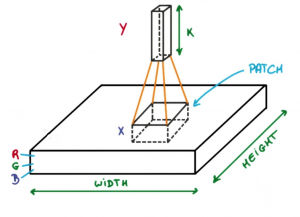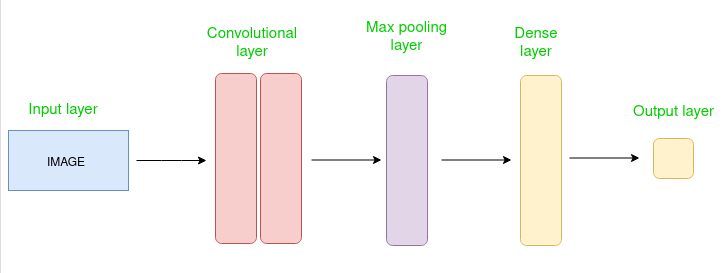

# EXAMPLE

The MNIST dataset is a classic benchmark in machine learning. It contains 70,000 grayscale images of handwritten digits (0 through 9), each sized 28x28 pixels. It's commonly used to evaluate image classification models.

Below is a simple Convolutional Neural Network (CNN) built with TensorFlow/Keras that classifies these handwritten digits:

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.8940 - loss: 0.3602 - val_accuracy: 0.9764 - val_loss: 0.0715
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 19ms/step - accuracy: 0.9804 - loss: 0.0663 - val_accuracy: 0.9821 - val_loss: 0.0526
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 19ms/step - accuracy: 0.9870 - loss: 0.0430 - val_accuracy: 0.9853 - val_loss: 0.0459
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - accuracy: 0.9914 - loss: 0.0288 - val_accuracy: 0.9867 - val_loss: 0.0397
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - accuracy: 0.9929 - loss: 0.0221 - val_accuracy: 0.9868 - val_loss: 0.0427
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.9950 - loss: 0.0154 - val_accuracy: 0.9860 - val_loss: 0.0453
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9960 - loss: 0.0126 - val_accuracy: 0.9867 - val_loss: 0.0459
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9973 -

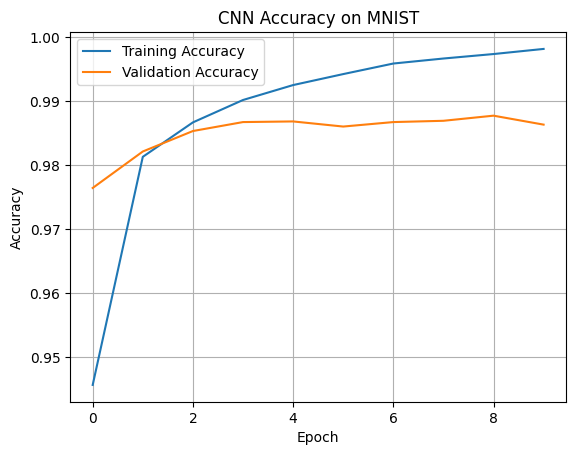

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

#load and preprocess MNIST data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train[..., tf.newaxis] / 255.0
x_test = x_test[..., tf.newaxis] / 255.0

#define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

#compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#train the model for 10 epochs
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

#plot accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('CNN Accuracy on MNIST')
plt.legend()
plt.grid(True)
plt.show()